# GRIP February'21 Task 1                                Submitted By: Saurav Sahoo

## Prediction Using Supervised ML

### Topic: Predict the percentage of an student based on the no. of study hours.

In [1]:
#command to save the changes to the file in every 10 sec
%autosave 10

Autosaving every 10 seconds


### Importing the requisite Python Libraries

In [22]:
#Python libraries below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

import matplotlib as mpl #additional plotting functionality

#command for better resolution of plot in Matplotlib
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 10

#modules for importing the data set from a public Github repo 
import requests
import io

#set seed for reproducibilty
np.random.seed(0)

### Importing the dataset's raw file from Github repo

In [3]:
# Import the dataset
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print("Data imported successfully")

Data imported successfully


### Reading the dataset

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Displaying the first 5 rows of the datset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#Displaying the last 5 rows of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Analysing the dataset

In [12]:
#returns an array of columns present in the datset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.shape #returns the the number of rows and columns in the data set

(25, 2)

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
#Returns boolean values denoting  the presence of NaN values (True if present False if absent)
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Plotting the dataset

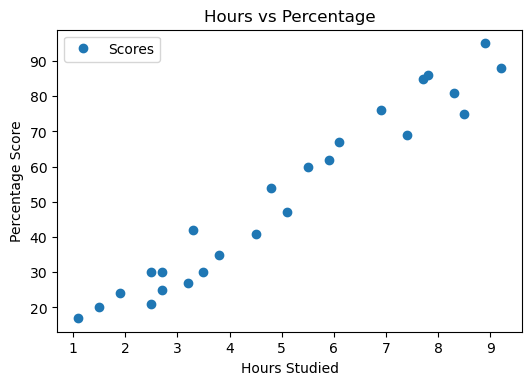

In [23]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

In [24]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Splitting data into training and test sets

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the algorithm

In [43]:
from sklearn.linear_model import LinearRegression  
Lin_reg = LinearRegression()  
Lin_reg.fit(X_train, y_train) 
print("Training complete!")

Training complete!


### Plotting the regression line

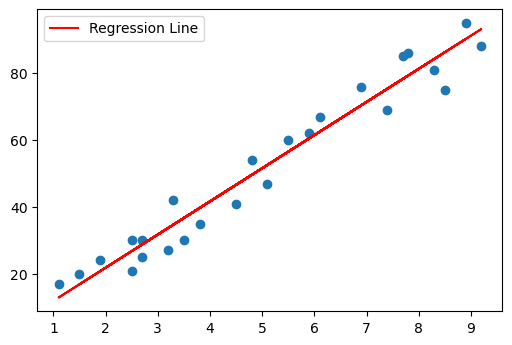

In [44]:
line = Lin_reg.coef_*X+Lin_reg.intercept_
plt.scatter(X, y)
plt.plot(X, line, color='red', label='Regression Line');
plt.legend()
plt.show()

### Making predictions

In [30]:
print(X_test) 
y_pred = Lin_reg.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparison of Actual Vs Predicted

In [36]:
# Making another Dataframe constituting the predicted and testing dataset
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
#Determination of scores based on training set
Lin_reg.score(X_train,y_train)

0.9515510725211552

In [35]:
#Determination of score based on testing set
Lin_reg.score(X_test,y_test)

0.9454906892105356

### Predicting score if a student studies 9.25 hrs/day

In [40]:
hours = 9.25
tst = np.array([hours])
tst = tst.reshape(-1, 1)
own_pred = Lin_reg.predict(tst)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
